## End-to-end Multi-class cifar10 classification using Neural Networks

###### This is a dataset of 60,000 28x28 grayscale images of the 10 digits, along with a test set of 10,000 images.
Here are the classes in the dataset, as well as 10 random images from each:
##### 1. airplane
##### 2. automobile
##### 3. bird
##### 4. cat
##### 5. deer
##### 6. dog
##### 7. frog
##### 8. horse
##### 9. ship
##### 10. truck


## 1. Problem :
Identify the classes (i.e airplane, cat, bird, beer ...) using Tensoflow and Tensoflow Hub given an image.

## 2. Data :
The dataset is from Keras library.

## 3. Evaluation :
Since the problem we've is a classification problem, is the accuracy and the probability to predict the class correctly.

## 4. Features :
 * We're dealing with images(unstructured data)
 * 10 different image classes.
 * There are 50000 different images (have labels) in the trainig set and 10000 images (no labels) in the test set
 

In [39]:
import numpy as np
import tensorflow as tf
import tensorflow_hub as hub 
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [17]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

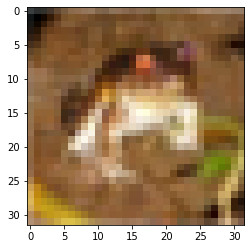

In [18]:
plt.imshow(X_train[0])

### Create the validation set to better choose the modal hyperparameters

In [40]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.2, random_state = 42)

Fortunetly we've our image in the same size, Let's jump to turning our images into tensors

In [45]:
def image_processing(img):
    """
    Turn image into tensor, and returns it.
    :params
    img: an ndarray-like
    returns a tensor.
    """
    
    img_tensor = tf.constant(img)
    return img_tensor

In order to Tensorflow to work as expected we need to turn our training/testing/validating that into the format of (image, label)

In [62]:
def img_label(img, label):
    """
    Takes an image and its label and return it as a tuple of tensors.
    """
    
    img_tensor = image_processing(img)
    label_tensor = tf.constant(label)
    
    return img_tensor, label_tensor
    

In [63]:
img_label(X_train[0], y_train[0])

(<tf.Tensor: shape=(32, 32, 3), dtype=uint8, numpy=
 array([[[34, 36, 43],
         [37, 37, 51],
         [44, 44, 64],
         ...,
         [62, 73, 93],
         [52, 63, 83],
         [45, 57, 77]],
 
        [[35, 35, 37],
         [34, 34, 40],
         [34, 33, 43],
         ...,
         [58, 69, 89],
         [50, 60, 80],
         [47, 58, 78]],
 
        [[34, 33, 35],
         [33, 32, 36],
         [33, 32, 38],
         ...,
         [66, 77, 97],
         [51, 62, 82],
         [53, 64, 84]],
 
        ...,
 
        [[32, 32, 38],
         [32, 31, 37],
         [33, 33, 38],
         ...,
         [41, 38, 45],
         [34, 31, 38],
         [36, 32, 40]],
 
        [[33, 31, 36],
         [32, 30, 36],
         [34, 32, 37],
         ...,
         [37, 35, 40],
         [32, 29, 35],
         [30, 28, 33]],
 
        [[37, 32, 35],
         [37, 32, 36],
         [37, 33, 36],
         ...,
         [49, 47, 49],
         [47, 45, 48],
         [58, 56, 58]]], dtyp

To speed up training process in Tensorflow we need to train our model using batches; a small amount of our training set 

In [ ]:
def batchifiy_img():
    """
    
    """

In [65]:
a = y_train[0] == labels

In [66]:
a.astype(int)

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0])

In [73]:
labels = np.unique(y_train)
labels

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [77]:
boolean_labels = [label == labels for label in y_train]

In [82]:
boolean_labels[:3]

[array([False, False, False, False, False, False,  True, False, False,
        False]),
 array([False, False,  True, False, False, False, False, False, False,
        False]),
 array([False, False, False, False, False,  True, False, False, False,
        False])]

In [83]:
y_train[:3]

array([[6],
       [2],
       [5]], dtype=uint8)